Calculated P50 from provided data: 2.40 kPa


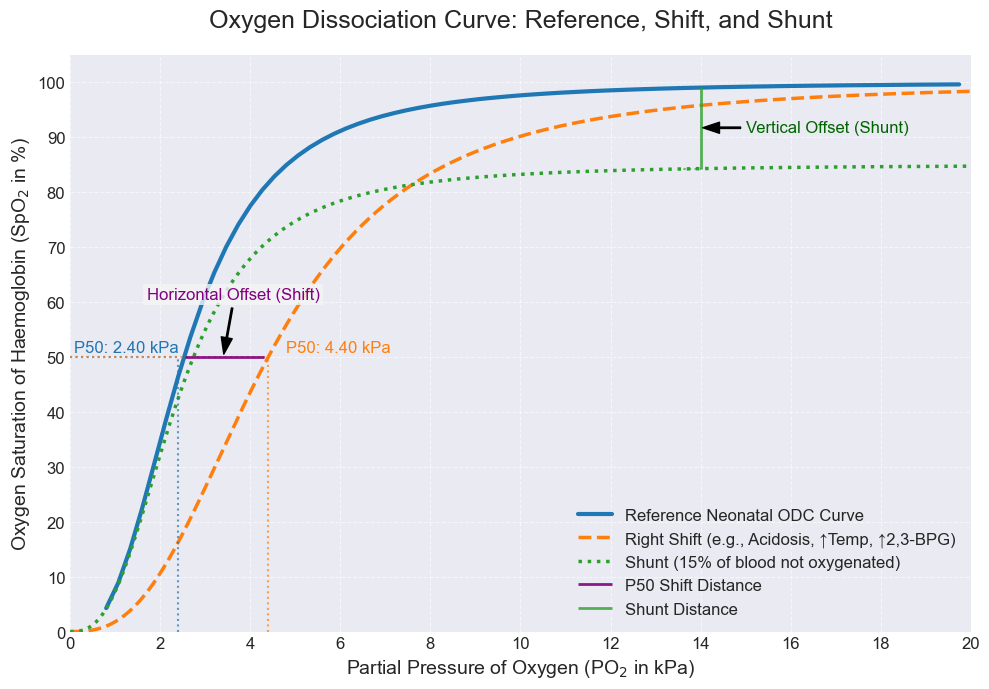

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def oxygen_dissociation_curve_hill(po2, p50, n):
    """
    Calculates oxygen saturation based on the Hill equation.
    This equation describes the sigmoidal shape of the oxygen dissociation curve.

    Parameters:
    po2 (float or np.array): Partial pressure of oxygen in kPa.
    p50 (float): The partial pressure of oxygen at which hemoglobin is 50% saturated, in kPa.
    n (float): The Hill coefficient, representing the cooperativity of oxygen binding
               to hemoglobin. A typical value for human hemoglobin is around 2.7.

    Returns:
    float or np.array: Oxygen saturation as a fraction (0 to 1).
    """
    # Hill equation formula
    return (po2**n) / (p50**n + po2**n)

# --- Provided ODC Data (Reference Curve) ---
# PO2 in kPa, SO2 in %
data_str = """0.7996,4.27
1.0664,8.85
1.3332,15.06
1.6,22.49
1.8668,30.56
2.1336,38.7
2.4004,46.46
2.6672,53.56
2.934,59.87
3.2008,65.36
3.4676,70.08
3.7344,74.1
4.0012,77.51
4.268,80.41
4.5348,82.86
4.8016,84.94
5.0684,86.71
5.3352,88.23
5.602,89.53
5.8688,90.65
6.1356,91.62
6.4024,92.46
6.6692,93.2
6.936,93.84
7.2028,94.4
7.4696,94.9
7.7364,95.34
8.0032,95.73
8.27,96.08
8.5368,96.39
8.8036,96.66
9.0704,96.92
9.3372,97.14
9.604,97.34
9.8708,97.53
10.1376,97.7
10.4044,97.85
10.6712,97.99
10.938,98.12
11.2048,98.23
11.4716,98.34
11.7384,98.44
12.0052,98.53
12.272,98.61
12.5388,98.69
12.8056,98.76
13.0724,98.83
13.3392,98.89
13.606,98.95
13.8728,99.0
14.1396,99.05
14.4064,99.1
14.6732,99.14
14.94,99.18
15.2068,99.22
15.4736,99.25
15.7404,99.29
16.0072,99.32
16.274,99.35
16.5408,99.38
16.8076,99.4
17.0744,99.43
17.3412,99.45
17.608,99.47
17.8748,99.49
18.1416,99.51
18.4084,99.53
18.6752,99.55
18.942,99.57
19.2088,99.58
19.4756,99.6
19.7424,99.61
20.0092,99.63
20.276,99.64
20.5428,99.65
20.8096,99.66
21.0764,99.67
21.3432,99.69
21.61,99.7
21.8768,99.71
22.1436,99.71
22.4104,99.72
22.6772,99.73
22.944,99.74
23.2108,99.75
23.4776,99.76
23.7444,99.76
24.0112,99.77
24.278,99.78
24.5448,99.78
24.8116,99.79
25.0784,99.8
25.3452,99.8
25.612,99.81
25.8788,99.81
26.1456,99.82
26.4124,99.82
26.4124,99.99
"""

# Parse the provided data into NumPy arrays
po2_reference_kPa = []
so2_reference_percent = []

for line in data_str.strip().split('\n'):
    # Skip empty lines
    if not line:
        continue
    po2_str, so2_str = line.split(',')
    po2_reference_kPa.append(float(po2_str))
    so2_reference_percent.append(float(so2_str))

po2_reference_kPa = np.array(po2_reference_kPa)
so2_reference_percent = np.array(so2_reference_percent) / 100.0 # Convert % to fraction

# --- Calculate P50 from the provided reference data ---
# Find the index where SO2 is closest to 50% (0.50 as a fraction)
idx_50_percent = np.argmin(np.abs(so2_reference_percent - 0.50))
p50_reference_kPa = po2_reference_kPa[idx_50_percent]

print(f"Calculated P50 from provided data: {p50_reference_kPa:.2f} kPa")

# --- Define parameters for generated curves (Shift and Shunt) ---
# Use the calculated P50 from the reference data as the base
p50_ideal_for_generation = p50_reference_kPa
n = 2.7 # Hill coefficient, assumed to be constant for all curves

# Define a PO2 range for generating smooth curves for shift and shunt,
# now explicitly going up to 20 kPa
po2_generation_range_kPa = np.linspace(0, 20, 500) # X-axis up to 20 kPa

# --- 2. Right Shift Curve (Shift) ---
# A right shift implies a higher P50. We'll add a fixed amount to the reference P50.
# Increased shift amount for a more extreme effect
shift_amount_kPa = 2.0 # Increased from 0.8 to 2.0 for a more extreme shift
p50_shifted_kPa = p50_ideal_for_generation + shift_amount_kPa
saturation_shifted = oxygen_dissociation_curve_hill(
    po2_generation_range_kPa, p50_shifted_kPa, n
)

# --- 3. Shunt Curve (Vertical Offset) ---
# Represents blood bypassing oxygenation, leading to a reduced maximum saturation.
# Increased shunt percentage for a more extreme effect
shunt_percentage = 0.15 # Increased from 0.10 (10%) to 0.25 (25%) for a more extreme shunt
max_saturation_after_shunt = 1.0 - shunt_percentage
saturation_shunt = oxygen_dissociation_curve_hill(
    po2_generation_range_kPa, p50_ideal_for_generation, n
) * max_saturation_after_shunt

# --- Plotting the Curves ---
plt.figure(figsize=(10, 7))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot the provided data as the Reference Curve
# Filter reference data to only show points within the new x-axis limit
po2_ref_filtered = po2_reference_kPa[po2_reference_kPa <= 20]
so2_ref_filtered = so2_reference_percent[po2_reference_kPa <= 20]

plt.plot(po2_ref_filtered, so2_ref_filtered * 100,
         label='Reference Neonatal ODC Curve',
         color='#1f77b4', # A shade of blue
         linewidth=3, # Slightly thicker to distinguish measured data
         # Removed marker and markersize to only show the line
         linestyle='-')

# Plot the right-shifted curve
plt.plot(po2_generation_range_kPa, saturation_shifted * 100,
         label='Right Shift (e.g., Acidosis, ↑Temp, ↑2,3-BPG)',
         color='#ff7f0e', # A shade of orange
         linestyle='--',
         linewidth=2.5)

# Plot the shunt curve
plt.plot(po2_generation_range_kPa, saturation_shunt * 100,
         label=f'Shunt ({shunt_percentage*100:.0f}% of blood not oxygenated)',
         color='#2ca02c', # A shade of green
         linestyle=':',
         linewidth=2.5)

# --- Adding Visual Markers and Annotations for Shift and Shunt ---

# Annotate the "Right Shift"
# 1. Mark the P50 for the reference curve
plt.vlines(p50_reference_kPa, 0, 50, color='#1f77b4', linestyle=':', alpha=0.7)
plt.hlines(50, 0, p50_reference_kPa, color='#1f77b4', linestyle=':', alpha=0.7)
plt.text(p50_reference_kPa, 50.3, f'P50: {p50_reference_kPa:.2f} kPa',
         color='#1f77b4', verticalalignment='bottom', horizontalalignment='right', fontsize=12)

# 2. Mark the P50 for the shifted curve
plt.vlines(p50_shifted_kPa, 0, 50, color='#ff7f0e', linestyle=':', alpha=0.7)
plt.hlines(50, 0, p50_shifted_kPa, color='#ff7f0e', linestyle=':', alpha=0.7)
plt.text(p50_shifted_kPa + 0.4, 50.3, f'P50: {p50_shifted_kPa:.2f} kPa',
         color='#ff7f0e', verticalalignment='bottom', horizontalalignment='left', fontsize=12)

# Add a horizontal line between the original P50 and the shifted P50 at 50% saturation
# Adjusted to be exactly between p50_reference_kPa and p50_shifted_kPa
plt.hlines(50, p50_reference_kPa + 0.15, p50_shifted_kPa - 0.1,
           color='purple', linestyle='-', linewidth=2, alpha=0.9, label='P50 Shift Distance')

# 3. Add an arrow and text to clearly indicate the rightward shift
plt.annotate('Horizontal Offset (Shift)', xy=(p50_reference_kPa + (p50_shifted_kPa - p50_reference_kPa)/2, 50), xytext=(p50_reference_kPa - 0.7, 60),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             horizontalalignment='left', verticalalignment='bottom', fontsize=12, color='purple',
             bbox=dict(facecolor='whitesmoke', edgecolor='none', boxstyle='square,pad=0.2', alpha=0.8)) # Added bbox

# Annotate the "Shunt" (Vertical Offset)
# Choose a high PO2 value from the generation range to show the difference in maximum saturation
po2_for_shunt_marker = 14.0 # kPa, MOVED THE LINE TO THE LEFT
sat_ideal_at_high_po2 = oxygen_dissociation_curve_hill(po2_for_shunt_marker, p50_ideal_for_generation, n) * 100
sat_shunt_at_high_po2 = oxygen_dissociation_curve_hill(po2_for_shunt_marker, p50_ideal_for_generation, n) * max_saturation_after_shunt * 100

# Draw a vertical line to highlight the vertical difference due to shunt
plt.vlines(po2_for_shunt_marker, sat_shunt_at_high_po2, sat_ideal_at_high_po2,
           color='#2ca02c', linestyle='-', linewidth=2, alpha=0.8, label='Shunt Distance')

# Add horizontal lines to show the saturation levels at the marker PO2
plt.hlines(sat_ideal_at_high_po2, po2_for_shunt_marker - 0.5, po2_for_shunt_marker, # adjusted xmax
           color='#1f77b4', linestyle=':', alpha=0.7)
plt.hlines(sat_shunt_at_high_po2, po2_for_shunt_marker - 0.5, po2_for_shunt_marker, # adjusted xmax
           color='#2ca02c', linestyle=':', alpha=0.7)

# Add an arrow and text to clearly indicate the vertical offset
# Adjusted xytext to move text to the right
plt.annotate('Vertical Offset (Shunt)', xy=(po2_for_shunt_marker, (sat_ideal_at_high_po2 + sat_shunt_at_high_po2)/2),
             xytext=(po2_for_shunt_marker + 1.0, (sat_ideal_at_high_po2 + sat_shunt_at_high_po2)/2), # Adjusted xytext x-coordinate
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             horizontalalignment='left', verticalalignment='center', fontsize=12, color='darkgreen')

# --- Customize Plot Appearance ---
plt.title('Oxygen Dissociation Curve: Reference, Shift, and Shunt', fontsize=18, pad=20)
plt.xlabel('Partial Pressure of Oxygen (PO$_{2}$ in kPa)', fontsize=14)
plt.ylabel('Oxygen Saturation of Haemoglobin (SpO$_{2}$ in %)', fontsize=14)

# Set x and y axis limits for better visualization
plt.xlim(0, 20) # Explicitly set x-axis limit to 20 kPa
plt.ylim(0, 105)

# Add a legend to identify each curve
plt.legend(loc='lower right', fontsize=12)

# Add a grid for easier reading of values
plt.grid(True, linestyle='--', alpha=0.6)

# Set specific ticks for x and y axes
plt.xticks(np.arange(0, 21, 2), fontsize=12) # Ticks every 2 kPa up to 20
plt.yticks(np.arange(0, 101, 10), fontsize=12)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()